In [53]:
from math import *

from MITgcmutils import rdmds

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

%matplotlib inline

from netCDF4 import Dataset


import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import sys

import seaborn as sns

lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import MetricsPythonTools as mpt




In [54]:
expPath = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/'
run = 'run16'
  
Grid1, GridOut1, State1,StateOut1,Ptracers1, PtracersOut1 = mpt.getDatasets(expPath, run)
FluxTR01 = ('%s/%s/FluxTR01Glob.nc' %(expPath, run))
FluxTR02 = ('%s/%s/FluxTR02Glob.nc' %(expPath, run))
FluxTR03 = ('%s/%s/FluxTR03Glob.nc' %(expPath, run))
 
nx = 360
ny = 360
nz = 90
  

rc = GridOut1.variables['RC']
xc = rout.getField(Grid1, 'XC') # x coords tracer cells
yc = rout.getField(Grid1, 'YC') # y coords tracer cells

drF = GridOut1.variables['drF'] # vertical distance between faces
dxG = rout.getField(Grid1,'dxG')

MaskCan = rout.getMask(Grid1,'HFacC') 
hFacCCan = rout.getField(Grid1,'HFacC') 
rACan = rout.getField(Grid1,'rA') 
drFCan=GridOut1.variables['drF']
time = StateOut1.variables['T']
nt = len(time)
print('Finished reading grid variables')

  

Finished reading grid variables


In [55]:
#Transect definitions (indices x,y,z,t)
  
CS = [0,359,227,227,0,29,10,nt]
#CS2 = [40,120,227,227,0,29,0,nt]
#CS3 = [120,240,267,267,0,29,0,nt]
#CS3sb = [120,240,227,227,0,29,0,nt]
#CS4 = [240,320,227,227,0,29,0,nt]
#CS5 = [320,359,227,227,0,29,0,nt]
#AS1 = [120,120,227,267,0,29,0,nt]
#AS2 = [240,240,227,267,0,29,0,nt]
LID = [120,240,227,267,29,29,0,nt]
#LID2 = [180,240,227,267,29,29,0,nt]
  

  
f = FluxTR01
tr = '1'
trstr = 'Tr1'

keyw = ('ADVrTr0%s' %tr)
keyv = ('ADVyTr0%s' %tr)
keyu = ('ADVxTr0%s' %tr)
    
W,V,U = mpt.get_TRAC(f, keyw ,keyv, keyu)
print('Shape of W is:')
print(np.shape(W))
    

   
    
   

Shape of W is:
(18, 90, 360, 360)


In [56]:
#Get slices
V_CSa = mpt.slice_TRAC(V,CS[0],CS[1],CS[2],CS[3],CS[4],CS[5],CS[6],CS[7])
V_CS = np.nanmean(V_CSa,axis=0)

W_LIDa = mpt.slice_TRAC(W,LID[0],LID[1],LID[2],LID[3],LID[4],LID[5],LID[6],LID[7])
W_LID = np.nanmean(W_LIDa,axis=0)

print(np.shape(V_CS))

(29, 359)


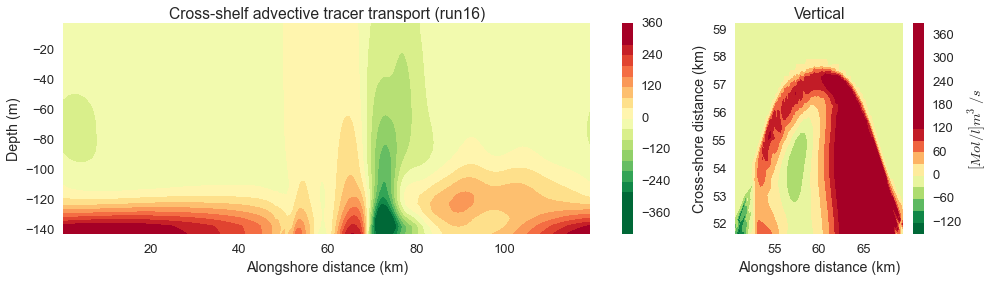

In [57]:
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(14,4))




   
ax1 = plt.subplot(1,4,(1,3))
#plt.plot(Bu[ii] , np.mean(watVertical[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
cf=plt.contourf(xc[1,:-1]/1000.0,rc[:29],V_CS,20, cmap='RdYlGn_r',vmax=300,vmin=-300)
cb=plt.colorbar(cf)
plt.ylabel('Depth (m)')
plt.xlabel('Alongshore distance (km)')
plt.title('Cross-shelf advective tracer transport (run16)')
    

ax2 = plt.subplot(1,4,4)
cf2=plt.contourf(xc[1,120:240]/1000.0,yc[227:267,1]/1000.0,W_LID,20, cmap='RdYlGn_r',vmax=120, vmin=-120)
cb=plt.colorbar(cf2)
cb.set_label('$[Mol/l]m^3/s$')
plt.ylabel('Cross-shore distance (km)')
plt.xlabel('Alongshore distance (km)')
plt.title('Vertical')
    
    #ax7.set_xscale("log", nonposy='clip')


    

    

plt.tight_layout()


plt.show()

fig42.savefig('results/figures/AdvTransRun16.eps', format='eps', dpi=1000, bbox_inches='tight')

